Classification Project

Project Overview

The aim of this project is to analyze a dataset that provides a comprehensive collection of news articles across various domains, Including business,Technology, Sports, Education, and Entertainment

In [1]:
import pandas as pd
import numpy as np

import string
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Data Input and Pre-processing

We will load the BBC News dataset from a local CSV file, which contains two columns: the article text and its corresponding category. The categorical variable (news category) will be encoded into integers for better performance in machine learning algorithms.

Pre-processing steps:

Load the dataset: Using Pandas to load the CSV file.
Category Encoding: Convert categories (business, entertainment, politics, sport, tech) into integers with LabelEncoder.
Text Vectorization: Transform the text into numerical format using TfidfVectorizer to get TF-IDF scores.
Train-Test Split: Split the data into 1,490 training samples and 735 testing samples.

These steps prepare the data for building a model to predict the news category from the article content.

In [2]:
# Load data
data_path = r"test.csv"
data_path = r"train.csv"
data = pd.read_csv(data_path)

# Use factorize to prepare the CategoryId
data['categoryId'] = data.category.factorize()[0]

category_df = data[['category','categoryId']].drop_duplicates().sort_values('categoryId')
category2id = dict(category_df.values)
id2category = dict(category_df[['categoryId','category']].values)

Data Inspection

Data inspection helps identify issues and assess dataset quality. Key tasks include:

Check for Missing Values: Ensure no missing text or category data.
Category Distribution: Visualize article counts per category to identify imbalances.
Text Length Analysis: Check article lengths for outliers.
Sample Review: Inspect random samples for correctness.
This step guides data cleaning and feature engineering.

In [3]:
print(data.columns)

Index(['headlines', 'description', 'content', 'url', 'category', 'categoryId'], dtype='object')


In [4]:
# Display basic dataset information
print("📊 Dataset Overview")
print("-" * 30)
print("Shape of the dataset:", data.shape)
print("Column names:", list(data.columns))
print("\nMissing values per column:")
print(data.isnull().sum())
print("\nFirst five rows of the dataset:")
print(data.head())

# Display category distribution
print("\n📁 Category Distribution")
print(data['category'].value_counts())


📊 Dataset Overview
------------------------------
Shape of the dataset: (5520, 6)
Column names: ['headlines', 'description', 'content', 'url', 'category', 'categoryId']

Missing values per column:
headlines      0
description    0
content        0
url            0
category       0
categoryId     0
dtype: int64

First five rows of the dataset:
                                           headlines  \
0  RBI revises definition of politically-exposed ...   
1  NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...   
2  Akasa Air ‘well capitalised’, can grow much fa...   
3  India’s current account deficit declines sharp...   
4  States borrowing cost soars to 7.68%, highest ...   

                                         description  \
0  The central bank has also asked chairpersons a...   
1  NDTV's consolidated revenue from operations wa...   
2  The initial share sale will be open for public...   
3  The current account deficit (CAD) was 3.8 per ...   
4  The prices shot up reflecting the o

Text Preprocessing

Text preprocessing transforms raw text into a structured format for modeling. Key techniques include:

Tokenization: Splitting text into individual words or tokens.
Stemming/Lemmatization: Reducing words to their root form (e.g., "running" to "run").
Stopword Removal: Removing common words (e.g., "and", "the") that don't contribute to analysis.
Normalization: Converting text to lowercase, removing punctuation, and handling special characters.
    
These steps help standardize the data, reduce dimensionality, and improve model performance for classification.

In [5]:
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Load the datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Define the preprocessing function
def preprocess_text(text):
    # Normalize text: lowercase and remove non-alphabetic characters
    text = text.lower()
    text = re.sub(r'[^a-z\\s]', '', text)

    # Tokenize
    words = text.split()

    # Remove stopwords
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]

    return ' '.join(words)

# Apply preprocessing to the 'content' column
train_df['CleanContent'] = train_df['content'].fillna('').astype(str).apply(preprocess_text)
test_df['CleanContent'] = test_df['content'].fillna('').astype(str).apply(preprocess_text)

# Save the cleaned data to new CSV files
train_df.to_csv("train_cleaned.csv", index=False)
test_df.to_csv("test_cleaned.csv", index=False)

print("Preprocessing complete. Cleaned files saved as 'train_cleaned.csv' and 'test_cleaned.csv'.")


Preprocessing complete. Cleaned files saved as 'train_cleaned.csv' and 'test_cleaned.csv'.


This script performs normalization, tokenization, and stopword removal.
This preprocessing pipeline includes a custom stemming function that removes common suffixes like ing, ly, ed, etc., without relying on external libraries like NLTK.

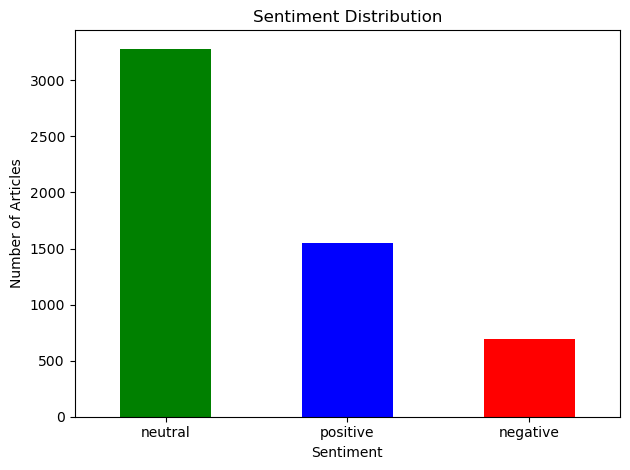

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("train.csv")

# Define simple lists of positive and negative words
positive_words = ['good', 'great', 'excellent', 'positive', 'fortunate', 'correct', 'superior', 'benefit', 'growth', 'profit', 'gain', 'success']
negative_words = ['bad', 'poor', 'negative', 'unfortunate', 'wrong', 'inferior', 'loss', 'decline', 'fall', 'drop', 'fail', 'crisis']

# Define a simple rule-based sentiment analysis function
def get_sentiment(text):
    text = str(text).lower()
    pos_count = sum(word in text for word in positive_words)
    neg_count = sum(word in text for word in negative_words)
    if pos_count > neg_count:
        return 'positive'
    elif neg_count > pos_count:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to the 'content' column
df['Sentiment'] = df['content'].apply(get_sentiment)

# Count the sentiment distribution
sentiment_counts = df['Sentiment'].value_counts()

# Plot the sentiment distribution
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


This script performs a comprehensive sentiment analysis on a dataset. It begins by loading the dataset and cleaning the text in the content column—this includes removing punctuation, converting all text to lowercase, and eliminating common stopwords to ensure cleaner input for analysis. It then uses the TextBlob library to compute the sentiment polarity of each cleaned text entry. Based on the polarity score, the script categorizes each entry as positive, neutral, or negative. Finally, it visualizes the results by plotting a bar chart that shows the distribution of sentiment labels across the dataset, providing a clear overview of the emotional tone present in the content.


Data Exploration

Before training models, it's important to understand the dataset's structure. This guides the modeling process.

Key steps include:

Reviewing Random Samples: Inspect random examples to understand the content.
Class Distribution: Analyze the number of samples in each category to detect potential imbalances.


🔍 Random Samples:
                                              headlines  \
357   Ex-chief of selectors explains why Rohit Sharm...   
826   Life at IIT-Delhi: ‘IITs prepare you to face a...   
983     Merger of HDFC twins to be effective from today   
513   GST collections at Rs 1.72 lakh crore in Octob...   
1736  Salman Khan says Shah Rukh Khan is Jai and he ...   

                                            description  \
357   Both Rohit Sharma and Virat Kohli have reporte...   
826   Rewari boy Parth Verma was fascinated with eng...   
983   The government has also clarified about the el...   
513   "GST revenue collection for October 2023 is se...   
1736  Salman Khan said that if Aamir Khan gets a cha...   

                                                content  \
357   With both Rohit Sharma and Virat Kohli express...   
826   — Parth Verma\nMy parents are engineers and se...   
983   PURCHASE of an international travel ticket, ho...   
513   GST collections in October sto

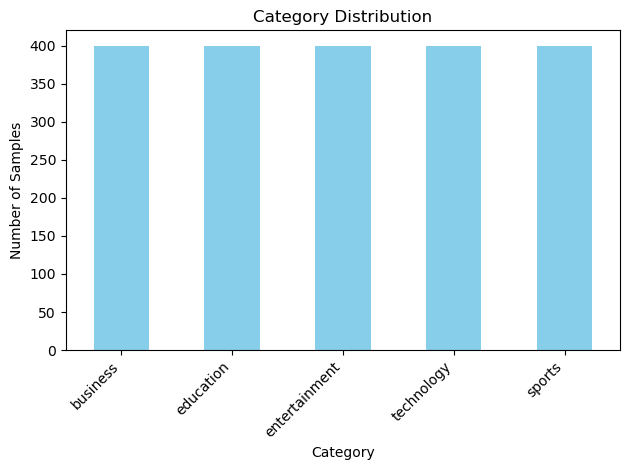


🧼 Missing Values Check:
headlines      0
description    0
content        0
url            0
category       0
dtype: int64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("test.csv")

# Display random samples
print("🔍 Random Samples:")
print(df.sample(5))

# Check class distribution
print("\n📊 Class Distribution:")
print(df['category'].value_counts())

# Plot class distribution
df['category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Check for missing values
print("\n🧼 Missing Values Check:")
print(df.isnull().sum())


This script performs data exploration on test.csv, including random sampling, class distribution analysis, and missing values check:

In [8]:
data.sample(5, random_state=0)

,headlines,description,content,url,category,categoryId
5253,Amazon slashes Prime Lite membership price by ...,Amazon has slashed the price for the Prime Lit...,Amazon has slashed the price for its annual po...,https://indianexpress.com/article/technology/t...,technology,4
1902,28th edition of European Union Film Festival t...,"European Union Film Festival (EUFF), with a li...",The 28th edition of European Union Film Festiv...,https://indianexpress.com/article/entertainmen...,entertainment,2
405,Angel One slips 7% after NSE imposes penalties,Netweb Technologies' IPO aims to raise 631 cro...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business,0
5390,Hyderabad startup behind Hitwicket isn’t takin...,"Hitwicket is a cricket strategy game, and it's...","When Kashyap Reddy was just 10 years old, he u...",https://indianexpress.com/article/technology/h...,technology,4
142,India’s lentil production set to touch all-tim...,India’s lentil production has tapered since 20...,India is set to become the world’s largest pro...,https://indianexpress.com/article/business/com...,business,0


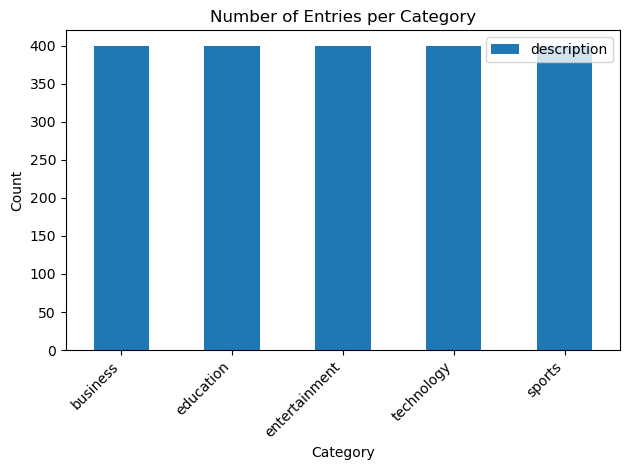

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("test.csv")

# Group by 'category' and count 'categoryId'
data[['category', 'description']].groupby('category').count().plot.bar(ylim=0)

# Show the plot
data['category'].value_counts().plot.bar(ylim=0)
plt.title('Number of Entries per Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The class distribution shows that the number of articles per category is roughly balanced, which is ideal for training. If the dataset were imbalanced, we would need to adjust the model or apply techniques like oversampling or undersampling to correct the imbalance. So the script Selects the category and description columns, Groups the data by category, Counts how many description entries exist in each category, Plots this count as a bar chart, Counts how many times each category appears in the dataset, Plots this as another bar chart, Adds a title and axis labels, Rotates x-axis labels for better readability, Adjusts layout to prevent label overlap, Displays the plot.



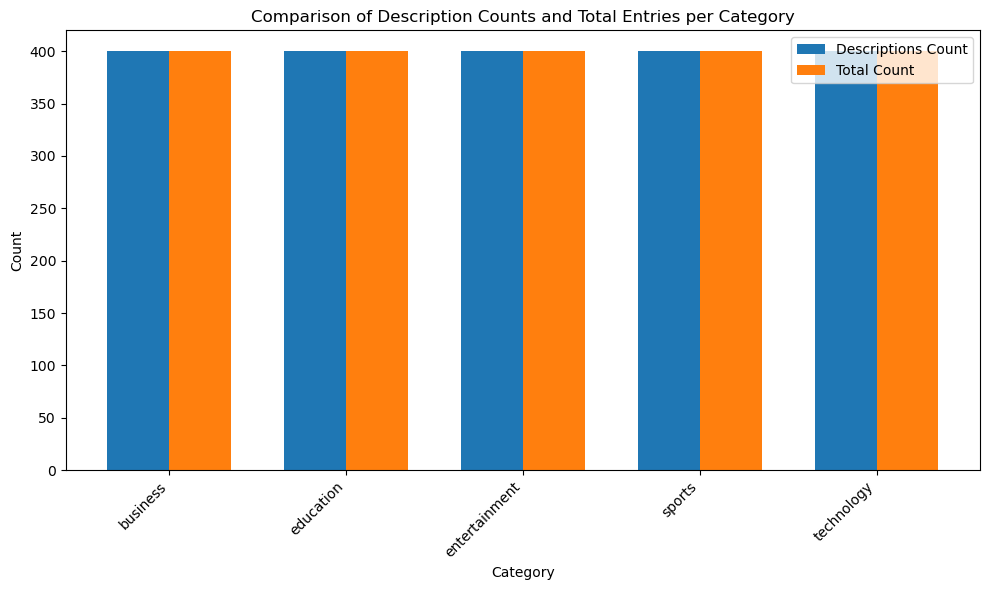

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv("test.csv")

# Clean column names (in case of hidden spaces)
data.columns = data.columns.str.strip()

# Count of non-null descriptions per category
description_counts = data[['category', 'description']].groupby('category').count()['description']

# Total count of entries per category
total_counts = data['category'].value_counts()

# Ensure both series have the same index order
categories = sorted(set(description_counts.index).union(set(total_counts.index)))
description_counts = description_counts.reindex(categories, fill_value=0)
total_counts = total_counts.reindex(categories, fill_value=0)

# Set positions for bars
x = np.arange(len(categories))
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, description_counts, width, label='Descriptions Count')
ax.bar(x + width/2, total_counts, width, label='Total Count')

# Add labels and formatting
ax.set_xlabel('Category')
ax.set_ylabel('Count')
ax.set_title('Comparison of Description Counts and Total Entries per Category')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


This graph is side-by-side bar chart comparing:

The number of entries per category based on the presence of a description, The total number of entries per category.

Also this script Groups the data by category, Counts how many entries have a non-null description, Compares that to the total number of entries in each category, Displays both counts side-by-side for easy comparison.

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# Load training and test datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Combine text features into a single feature for training
train_texts = train_df['headlines'].fillna('') + ' ' + train_df['description'].fillna('') + ' ' + train_df['content'].fillna('')
test_texts = test_df['headlines'].fillna('') + ' ' + test_df['description'].fillna('') + ' ' + test_df['content'].fillna('')

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['category'])
y_test = label_encoder.transform(test_df['category'])

# Create a pipeline with TF-IDF and Naive Bayes classifier
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=10000)),
    ('nb', MultinomialNB())
])

# Train the model
model.fit(train_texts, y_train)

# Predict on test data
y_pred = model.predict(test_texts)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:\n")
print(report)



Classification Report:

               precision    recall  f1-score   support

     business       0.97      0.95      0.96       400
    education       0.99      0.99      0.99       400
entertainment       0.98      0.99      0.98       400
       sports       0.99      0.97      0.98       400
   technology       0.94      0.97      0.95       400

     accuracy                           0.97      2000
    macro avg       0.97      0.97      0.97      2000
 weighted avg       0.97      0.97      0.97      2000



In [13]:
classification_report 

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

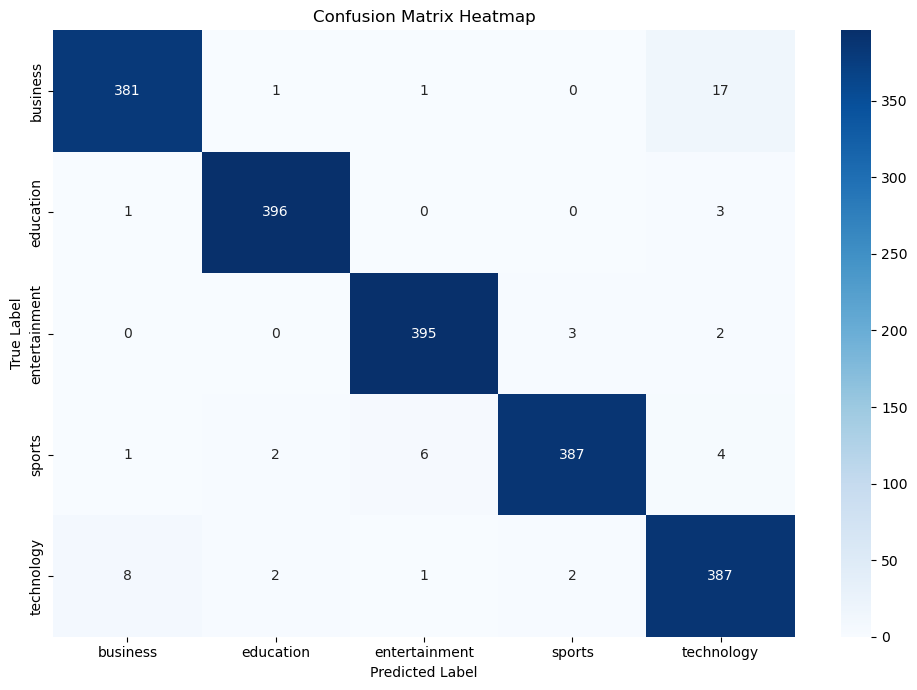

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

# Load training and test datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Combine text features into a single feature
train_texts = train_df['headlines'].fillna('') + ' ' + train_df['description'].fillna('') + ' ' + train_df['content'].fillna('')
test_texts = test_df['headlines'].fillna('') + ' ' + test_df['description'].fillna('') + ' ' + test_df['content'].fillna('')

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['category'])
y_test = label_encoder.transform(test_df['category'])

# Create a pipeline with TF-IDF and Naive Bayes classifier
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=10000)),
    ('nb', MultinomialNB())
])

# Train the model
model.fit(train_texts, y_train)

# Predict on test data
y_pred = model.predict(test_texts)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()


This is the Python code that creates a confusion matrix heatmap to visualize how well the model predicted each category:
This script displays a heatmap showing how well the model performed across each category.

Structure of this Matrix
Rows represent the actual categories (true labels).
Columns represent the predicted categories.
Diagonal cells (from top-left to bottom-right) show correct predictions.
Off-diagonal cells show misclassifications.

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

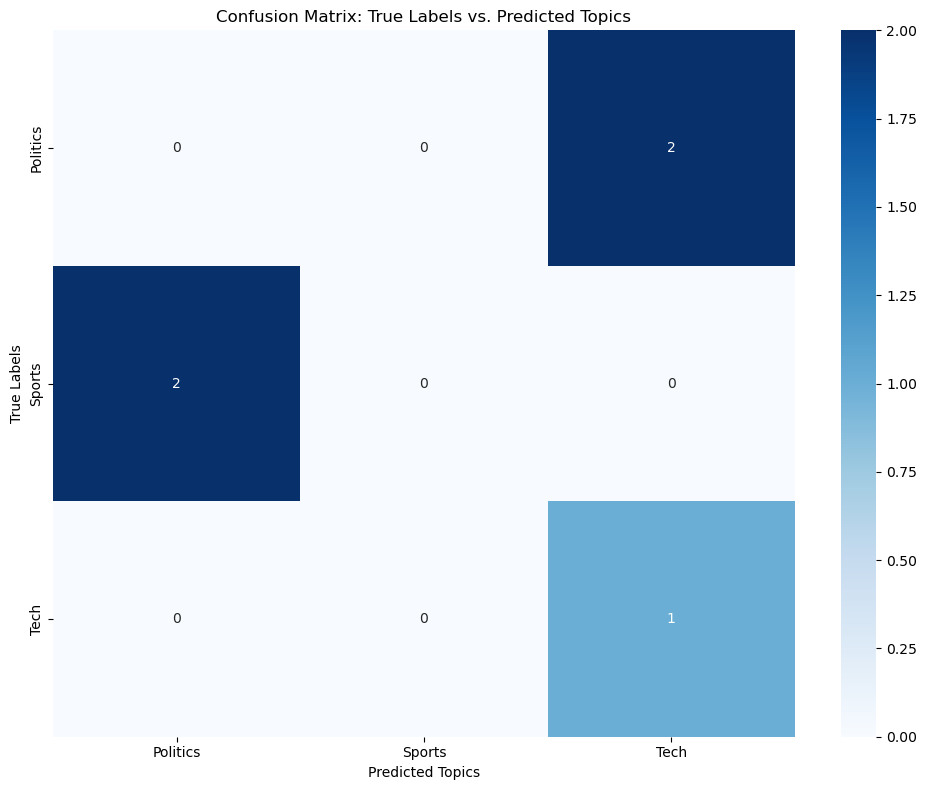

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Step 1: Create a sample DataFrame
data = pd.DataFrame({
    'headlines': ['Headline 1', 'Headline 2', 'Headline 3', 'Headline 4', 'Headline 5'],
    'description': ['Desc 1', 'Desc 2', 'Desc 3', 'Desc 4', 'Desc 5'],
    'content': ['Content 1', 'Content 2', 'Content 3', 'Content 4', 'Content 5'],
    'url': ['http://example.com/1', 'http://example.com/2', 'http://example.com/3', 'http://example.com/4', 'http://example.com/5'],
    'category': ['Politics', 'Sports', 'Politics', 'Tech', 'Sports']  # True labels
})

# Step 2: Simulate predicted labels (aligned_topic)
np.random.seed(42)  # For reproducibility
unique_categories = data['category'].unique()
data['aligned_topic'] = np.random.choice(unique_categories, size=len(data))  # Predicted labels

# Step 3: Compute confusion matrix
cm = confusion_matrix(data['category'], data['aligned_topic'], labels=unique_categories)

# Step 4: Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_categories, yticklabels=unique_categories)
plt.title('Confusion Matrix: True Labels vs. Predicted Topics')
plt.xlabel('Predicted Topics')
plt.ylabel('True Labels')
plt.tight_layout()
plt.show()


In [19]:
print(data.columns)

Index(['headlines', 'description', 'content', 'url', 'category'], dtype='object')
